# Predictive Modelling and Analytics - Tutorial 2

# Intro to Data Classification

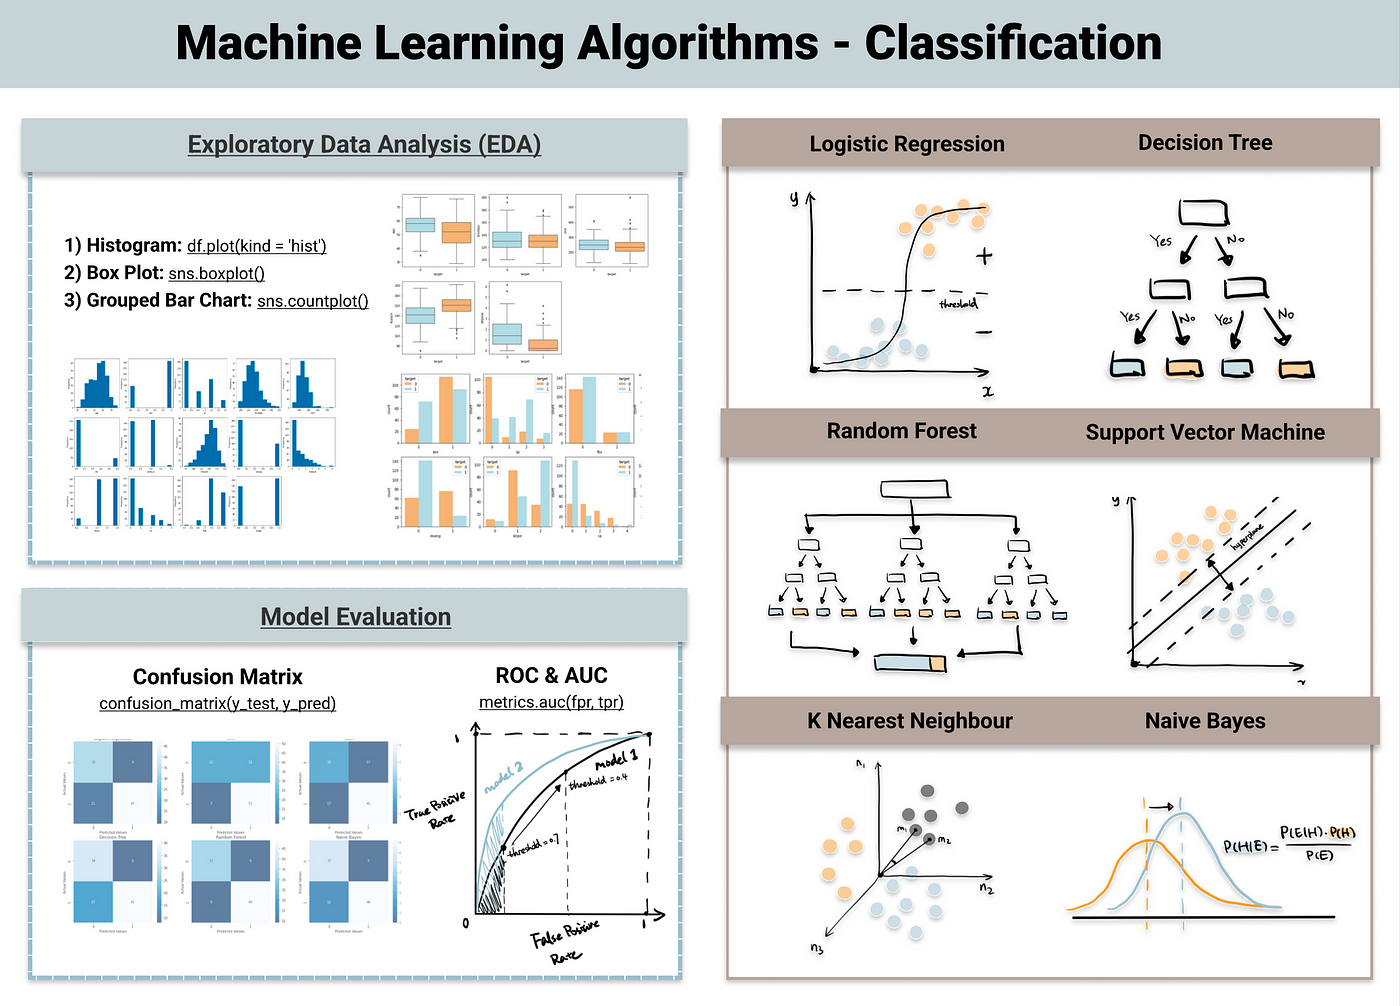

Belakangan ini, banyak industri yang berhadapan dengan dataset yang berukuran sangat besar dengan tipe data yang bervariasi. Memproses semua informasi itu secara manual tentunya akan memakan banyak waktu dan tidak menambah value secara jangka panjang. Banyak strategi yang digunakan dalam menangani masalah tersebut, mulai dari solusi seperti otomasi hingga memanfaatkan machine learning diimplementasikan dalam berbagai tasks dalam sebuah perusahaan.


Bagaimana cara untuk memudahkan dan mengkatalisasi proses analisis data? Salah satunya adalah dengan menggunakan metode klasifikasi.


## Data Classification dalam Konteks Machine Learning

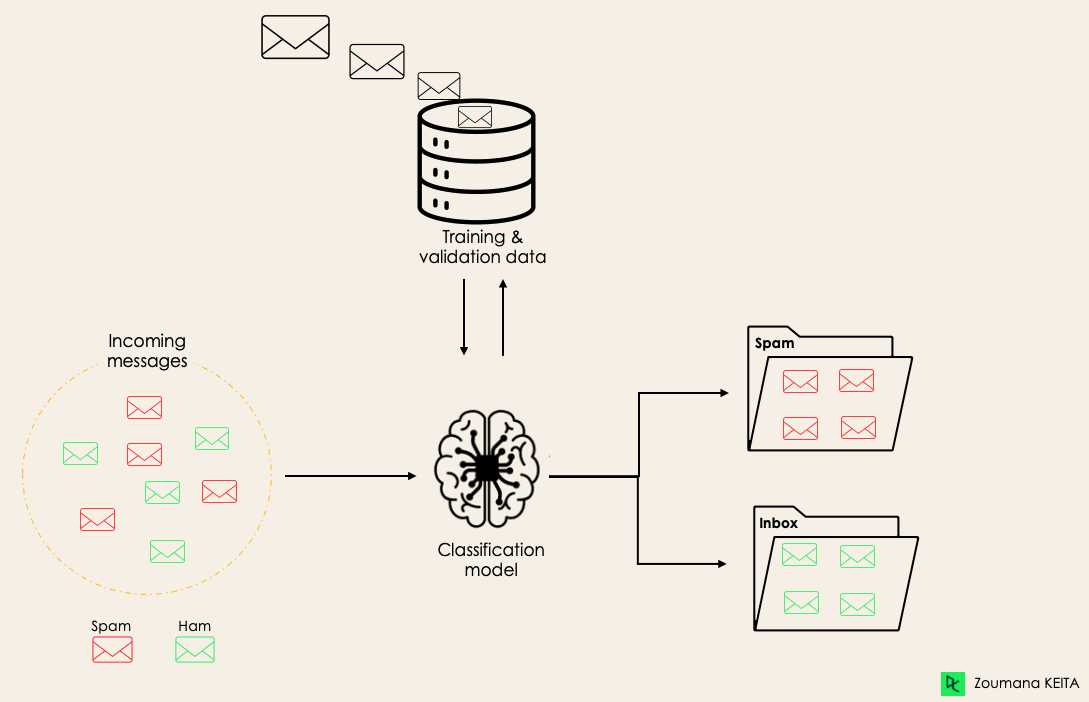

Dalam konteks machine learning, klasifikasi data mengacu pada metode machine learning yang bersifat supervised, dimana model berusaha untuk memprediksi label (output) dari sebuah data yang diberikan (input). Dalam klasifikasi, model tersebut akan dilatih menggunakan training data, dan dievaluasi menggunakan test data. Kemudian, model tersebut akan memiliki parameter tertentu untuk meng-handle input data ketika kemudian diberikan data yang berbeda dari train/test data.

## Jenis-Jenis Model Klasifikasi Data

Jenis-Jenis Model Klasifikasi Data
Terdapat beberapa macam model klasifikasi data, antara lain:
Logistic Regression

* Decision Tree
* Random Forest
* K-Nearest Neighbors
* Naive Bayes
* Support Vector Machine
* Neural Networks
* dll.

# Hands-on Tutorial 2

Pada asistensi kali ini, kita akan mempelajari macam-macam model klasifikasi data dan bagaimana cara mengimplementasikannya dalam sebuah dataset bawaan yang akan kita ambil dari Seaborn bernama “Titanic,” yang berisi data penumpang TItanic. Data tersebut terdiri atas 14 atribut dan 891 baris data. Kita akan menyiapkan data terlebih dahulu sebelum mengimplementasikan dan mengembangkan model prediktif pada data tersebut.

## Prerequisites (Importing Dependables)

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

## Data Preparation

### Data Loading & Preprocessing

Seperti yang sempat dijelaskan pada Tutorial lalu, kita dapat melakukan loading dataset bawaan seaborn dengan menggunakan syntax sns.load_dataset(). Karena dataset “Titanic” merupakan dataset yang diperuntukkan berlatih model prediktif, kita dapat menggunakan syntax tersebut dengan mudah.


Kita juga akan menerapkan beberapa dasar-dasar data preprocessing seperti yang sudah dijelaskan pada pertemuan sebelumnya.


In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic = pd.DataFrame(titanic)

In [ ]:
titanic.head()

In [ ]:
titanic.info()

Setelah melihat informasi pada dataset Titanic, dapat kita ketahui bahwa terdapat 15 kolom atribut, dengan keterangan sebagai berikut:



1. survived: Apakah penumpang tersebut selamat/tidak. [0,1]
2. pclass: Nama lainnya "Passenger Class." [1,2,3]
3. sex: Jenis kelamin [male, female]
4. sibsp: Apakah penumpang memiliki saudara atau memiliki pasangan yang ikut perjalanan [0,1]
5. parch: Apakah penumpang memiliki orang tua/anak yang ikut perjalanan [0,1]
6. fare: Harga tiket [numeric]
7. embarked: Asal kota penumpang [S,C,Q]
8. class: Penumpang termasuk dalam kelas apa [First,Second,Third]
9. who: Termasuk dalam golongan apakah penumpang [man,woman,child]
10. adult_male: Apakah penumpang termasuk laki-laki dewasa/tidak [True,False]
11. deck: Penumpang termasuk dalam deck mana dalam kapal [A,B,C,D,E,F,G]
12. embark_town: Penumpang menaiki kapal dari kota mana [Southampton,Cherbourg,Queensland]
13. alive: Apakah penumpang masih hidup/tidak [no,yes]
14. alone: Apakah penumpang berangkat sendiri/tidak [True,False]


Namun, beberapa atribut ada yang bersifat redundan, ada yang memiliki data null, dan beberapa data type masih belum sesuai. Oleh karena itu, perlu dilakukan praproses data.

In [ ]:
# Periksa missing values
titanic.isnull().sum()

In [ ]:
titanic['who'].value_counts()

In [ ]:
titanic[titanic['age'].isnull()]

In [ ]:
titanic[titanic['age'].isnull()]['who'].value_counts()

In [ ]:
age_modus = titanic['age'].value_counts().idxmax()
print(age_modus)

In [ ]:
dt = titanic.copy()

In [ ]:
dt['age'].fillna(age_modus, inplace=True)
dt.head()

In [ ]:
dt.drop('deck', axis=1, inplace=True)
dt.head()

In [ ]:
dt.isnull().sum()

In [ ]:
dt[dt['embarked'].isna() | dt['embark_town'].isna()]

In [ ]:
dt.dropna(axis=0, inplace=True)
dt.info()

In [ ]:
dt['pclass'].value_counts()

In [ ]:
dt['class'].value_counts()

In [ ]:
dt_filtered = dt.drop('class', axis=1)
dt_filtered.head()

In [ ]:
dt_filtered['sex'].value_counts()

In [ ]:
dt_filtered['who'].value_counts()

In [ ]:
dt_filtered['adult_male'].value_counts()

In [ ]:
dt_filtered = dt_filtered.drop(['who', 'adult_male'], axis=1)
dt_filtered.head()

In [ ]:
dt_filtered['embarked'].value_counts()

In [ ]:
dt_filtered['embark_town'].value_counts()

In [ ]:
dt_filtered = dt_filtered.drop('embarked', axis=1)
dt_filtered.head()

In [ ]:
dt_filtered['alive'].value_counts()

In [ ]:
dt_filtered['survived'].value_counts()

In [ ]:
dt_filtered = dt_filtered.drop('alive', axis=1)
dt_filtered.head()

In [ ]:
dt_encoded = dt_filtered.replace({
    'sex': {'male': 0 , 'female': 1},
    'alone': {False: 0, True: 1}})

dt_encoded.head()

In [ ]:
dt_encoded = dt_encoded.join(pd.get_dummies(dt_encoded['embark_town']))
dt_encoded = dt_encoded.drop('embark_town', axis=1)
dt_encoded.head()

In [ ]:
dt_encoded.info()

### Feature Selection

Feature Selection adalah metode untuk mengurangi variabel input ke dalam model dengan hanya menggunakan data yang relevan dan menghilangkan ‘noise’ dalam data.

In [ ]:
# visualize Correlation plot
corr = dt_encoded.corr('spearman')
sns.heatmap(corr,
            annot = np.where(np.abs(corr)>0.75,'S', # correlation more than +/- 75% labelled as 'STRONG CORRELATION'
                      np.where(np.abs(corr)>0.5,'M', # correlation more than +/- 50% labelled as 'MEDIUM CORRELATION'
                           np.where(np.abs(corr)>0.25,'W',''))), # correlation more than +/- 25% labelled as 'WEAK CORRELATION'
            mask=np.triu(np.ones_like(corr, dtype=bool)),
            square=True,
            center=0,fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8}
            )

Dalam correlation plot di atas, dapat diperhatikan bahwa terdapat 2 hubungan variabel yang bersifat S (Strong), yakni "Cherbourg dan Southampton", serta "sibsp dan alone"

Oleh karena itu, perlu dibuktikan bagaimana bentuk data kedua variabel tersebut ketika digambarkan dalam scatterplot.

In [ ]:
# plot data of "alone"&"sibsp" and "southampton"&"cherbourg"
fig, ax = plt.subplots(1, 3, figsize=(7,3))

# alone vs sibsp
sns.scatterplot(dt_encoded, x='alone', y='sibsp',ax=ax[0])
ax[0].set_title('alone vs sibsp')

sns.scatterplot(dt_encoded, x='alone', y='parch',ax=ax[1])
ax[1].set_title('alone vs parch')

# southampton vs cherbourg
sns.scatterplot(dt_encoded, x='Southampton', y='Cherbourg', ax=ax[2])
ax[2].set_title('soothampton vs cherbourg')

plt.tight_layout() # adjust spaces between subplots figure

Dari visualisasi di atas, dapat disimpulkan bahwa terdapat beberapa variabel yang redundan/tidak perlu.

Sebagai contoh, variabel alone dengan sibsp dan parch tentu saja berhubungan, karena apabila penumpang datang sendirian (alone), maka tidak mungkin memiliki hubungan keluarga (sibsp/parch).

Dalam konteks Southampton dan Cherbourg, kebetulan jumlah data yang berasal dari Southampton dan Cherbourg memiliki jumlah dan occurence yang serupa, maka memiliki correlation yang cukup tinggi.

In [ ]:
corr[['alone','Southampton']]

Setelah menemukan korelasi yang kuat antara variabel tadi, kemudian dibuktikan dalam correlation table di atas.

Pada sisi kiri, memang benar bahwa variabel sibsp dan parch memiliki korelasi yang besar dengan variabel "alone."

Pada sisi kanan, memang benar bahwa Cherbourg memiliki korelasi yang besar dengan variabel "alone."

Bagaimana inference di atas mempengaruhi proses Feature Selection? Ketika kita menyadari bahwa terdapat data yang korelasinya besar (Dalam kata lain memiliki bentuk yang serupa dengan variabel lain), maka sebaiknya **variabel yang korelasinya terbesar terhadap variabel tujuan saja yang diambil untuk diproses model.**

Di bawah ini, kita akan melihat korelasi variabel tadi terhadap variabel tujuan kita, yakni variabel "survived."

In [ ]:
corr.sort_values('survived', ascending=False, key=abs)['survived']

Dari data di atas, dapat disimpulkan sebagai berikut:

* Di antara variabel alone, parch, dan sibsp, variabel "alone" memiliki korelasi terbesar terhadap variabel "survived." Maka dari itu, variabel sibsp dan parch dapat di-ignore.
* Di antara variabel Cherbourg dan Southampton, variabel "Cherbourg" memiliki korelasi terbesar terhadap variabel "survived." Maka dari itu, variabel "Southampton" dapat di-ignore.

In [ ]:
dt_selected = dt_encoded.drop(['sibsp', 'parch', 'Southampton'], axis=1)
dt_selected.head()

### Data balancing

Setelah ini, data yang kita miliki akan dimasukkan ke dalam model machine learning. Sebelum dilakukan training, perlu dilakukan data balancing terlebih dahulu, dimana kita akan menyetarakan variabel tujuan (yang nantinya akan dijadikan bahan training) agar ketika model ditraining, hasil tidak skew/condong ke salah satu hasil.

In [ ]:
dt_selected['survived'].value_counts()

In [ ]:
X = dt_selected.drop('survived', axis=1)
y = dt_selected['survived']

Di atas ini, perlu dipahami bahwa variabel X akan digunakan sebagai "feature", dan variabel y akan digunakan sebagai "label" yang akan dijadikan bahan training.

In [ ]:
balancer = RandomOverSampler(random_state=42)
X_balanced, y_balanced = balancer.fit_resample(X, y)
y_balanced.value_counts()

Setelah dilakukan balancing, variabel tujuan memiliki jumlah yang setara antara kedua outcome.

### Data splitting

Selanjutnya, kita akan membagikan dataset menjadi "Training Dataset" dan "Testing Dataset," dimana umumnya Training Dataset akan memiliki jumlah yang jauh lebih besar daripada Testing Dataset.

Training Dataset akan digunakan untuk melatih machine learning model, dan Testing Dataset akan digunakan untuk memvalidasi hasil 'latihan' yang sudah dilakukan model untuk menentukan kelayakan sebuah model.

Dalam tutorial kali ini, kita akan menggunakan 80% data sebagai Training Dataset, dan 20% sisanya sebagai Testing Dataset.

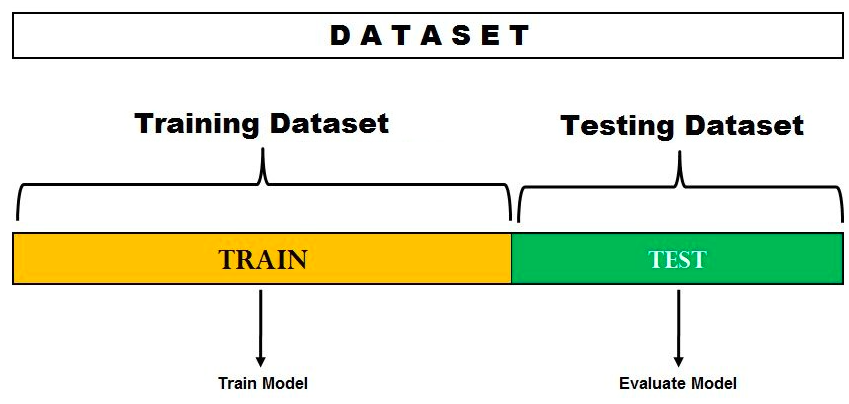


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=130, stratify=y)

#### Repeated holdout

Repeated holdout adalah metode data splitting yang membagi dataset berdasarkan n_splits dan mengambil sebanyak test_size.

Repeated holdout terdapat dua tipe, yakni ShuffleSplit dan StratifiedShuffleSplit. Perbedaan yang mencolok terdapat pada StratifiedShuffleSplit, dimana dalam proses data splitting akan juga memperhatikan keseimbangan jumlah variabel tujuan agar dalam proses pelatihan, model machine learning tidak condong ke satu output tertentu.

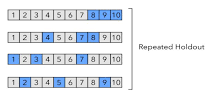

In [ ]:
# initialize ShuffleSplit splitter
rep_holdout = ShuffleSplit(n_splits=10, test_size=0.2, random_state=130)

# initialize StratifiedShuffleSplit splitter
strat_rep_holdout = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=130)

In [ ]:
train_set_rephold = []
test_set_rephold = []

print('\nRepeated Holdout\n')
for i, (train_index, test_index) in enumerate(strat_rep_holdout.split(X, y)): # for strat_repeated_holdout, incl. both X and y
# for i, (train_index, test_index) in enumerate(repeated_holdout.split(X)): # for repeated_holdout, incl. X only
  print(f"Fold {i}")
  print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
  print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")
  train_set_rephold.append(train_index)
  test_set_rephold.append(test_index)

In [ ]:
X.iloc[train_set_rephold[0]].describe()

#### K-fold cross validation

K-fold cross validation adalah metode lain data splitting yang memiliki fungsi serupa dengan repeated holdout. Bedanya, metode K-fold melakukan data splitting secara urut, sementara repeated holdout melakukan splitting dengan urutan random.

![link text](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/521px-K-fold_cross_validation_EN.svg.png)

In [ ]:
# initialize KFold splitter
kfold = KFold(n_splits=10, shuffle=True, random_state=130)

# initialize Stratified KFold splitter
strat_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

In [ ]:
train_set_kfold = []
test_set_kfold = []

print('\nKFold\n')
for i, (train_index, test_index) in enumerate(strat_kfold.split(X, y)): # for strat_kfold, incl. both X and y
# for i, (train_index, test_index) in enumerate(kfold.split(X)): # for kfold, incl. X only
  print(f"Fold {i}")
  print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
  print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")
  train_set_kfold.append(train_index)
  test_set_kfold.append(test_index)

In [ ]:
X.iloc[train_set_kfold[0]].describe()

### Feature scaling

Kita sudah mendekati proses training data! Langkah terakhir sebelum memilih model klasifikasi adalah untuk melakukan feature scaling. Pada dasarnya, feature scaling *menyetarakan* data numerikal yang ada dalam dataset agar *values* nya tidak terlalu jauh.

Terdapat dua macam feature scaling, yakni:
* Min-max scaling, dimana values akan dinormalkan berdasarkan value minimal dan maksimal sebuah atribut
* Standard scaling, dimana values akan distandarkan berdasarkan standar deviasi = 1

In [ ]:
X_balanced.describe()

In [ ]:
scaler = StandardScaler()

X_train['fare'] = scaler.fit_transform(X_train[['fare']]) # "fit" on the TRAIN set only, then transform
X_test['fare'] = scaler.transform(X_test[['fare']]) # while on the TEST set, just "transform" it

X_train['age'] = scaler.fit_transform(X_train[['age']])
X_test['age'] = scaler.transform(X_test[['age']])

X_train.describe()


Dalam feature scaling (terutama dalam konteks ini, karena tutorial akan menggunakan standard scaling), data yang kita miliki akan menjadi *jumbled*. Dalam kata lain, seperti tabel di atas, dapat terlihat bahwa age dan fare bisa memiliki nominal negatif.

Namun, kamu tidak perlu khawatir, karena pemberlakuan feature scaling digunakan untuk mencegah menurunnya akurasi, serta mencegah membludaknya computational cost. Di kata lain, perubahan yang ada pada tabel di atas hanya membantu dari perhitungan statistika dan tidak berpengaruh pada kenyataan dari data tersebut.

## Model Klasifikasi

### Logistic Regression




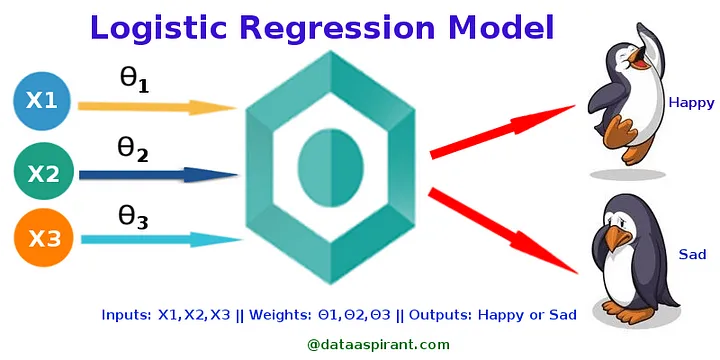

Logistic regression adalah algoritma machine learning yang supervised, digunakan untuk melakukan klasifikasi yang bertujuan untuk memprediksi probabilitias sebuah instansi tergolong pada kelas tertentu.

Logistic regression digunakan untuk memprediksi variabel **kategorikal**, maka ia akan memiliki output kategorikal atau diskret, seperti "Yes/No," "0/1," "True/False," dan sebagainya.

Namun, ia tidak akan serta-merta memberikan jawaban instansi tersebut terletak pada kelas mana, namun memberikan nilai probabilistik antara kelas-kelas tersebut.



![link text](https://miro.medium.com/v2/resize:fit:932/1*bCCcQhMjHGaI89i-7i3xFw.png)

Di bawah ini adalah cara untuk melakukan 'fitting' data yang kita miliki ke dalam klasifikasi model Logistic regression:

In [ ]:
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

### Decision Tree

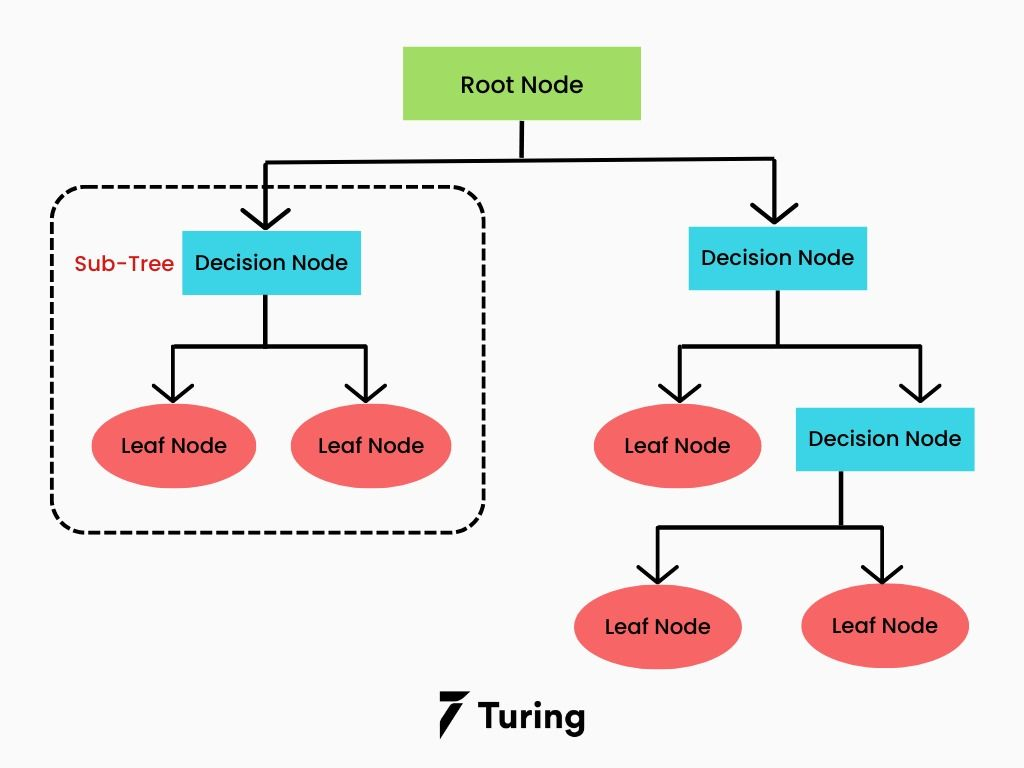

Sebuah pohon memiliki banyak analogi dalam kehidupan nyata, dan ternyata pohon tersebut telah memengaruhi area machine learning yang luas, mencakup klasifikasi dan regresi.

Dalam analisis keputusan, Decision Tree dapat digunakan untuk mewakili keputusan dan pengambilan keputusan secara visual dan eksplisit. Sesuai dengan namanya, ini menggunakan model keputusan seperti pohon.

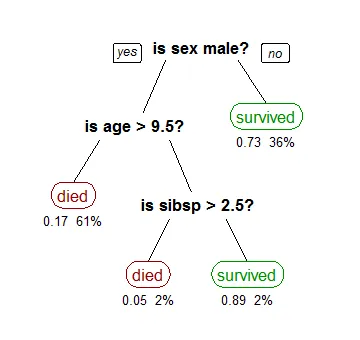

Sebuah Decision Tree digambar terbalik dengan akarnya berada di atas. Pada gambar di satas, teks **bold** mewakili kondisi yang menjadi dasar pemisahan pohon menjadi cabang. Ujung cabang yang tidak terbelah lagi adalah keputusan/leaf, dalam hal ini penumpang meninggal atau selamat, masing-masing direpresentasikan dalam teks berwarna merah dan hijau.

Di bawah ini adalah cara untuk melakukan 'fitting' data yang kita miliki ke dalam klasifikasi model Decision tree:

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

### Random Forest

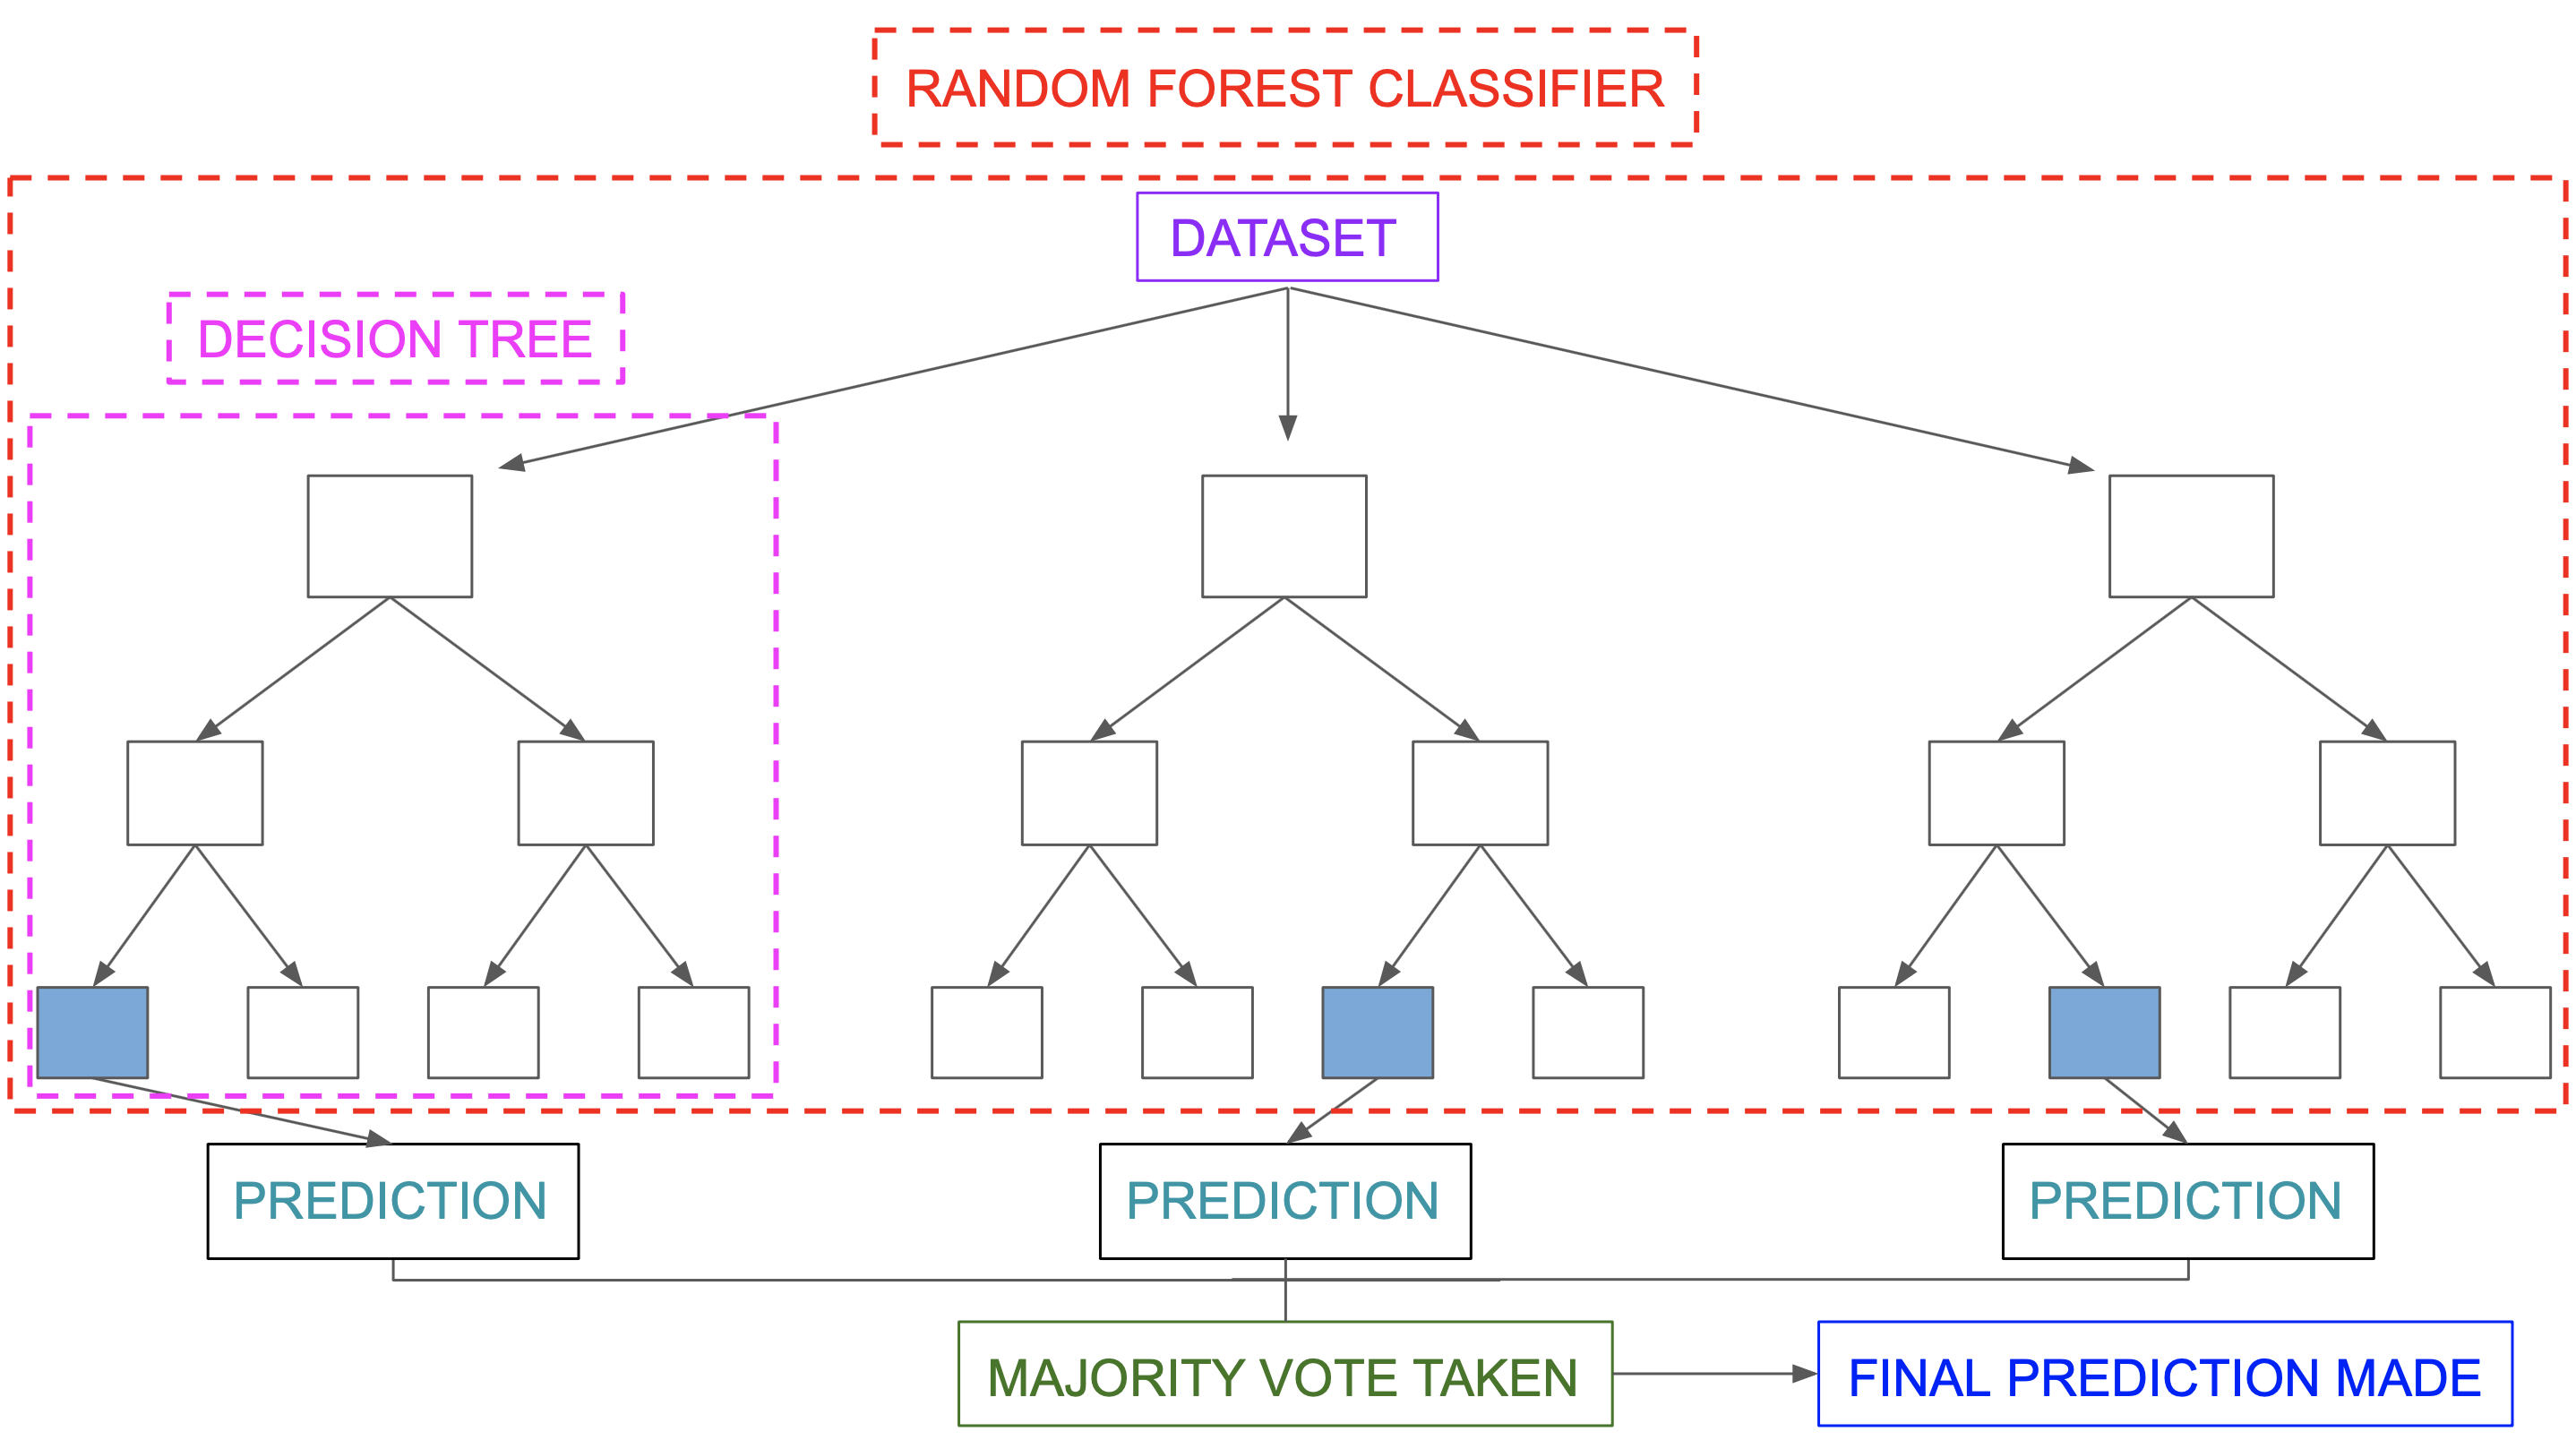

Random Forest adalah metode klasifikasi machine learning yang menggunakan pembelajaran ansambel, yaitu teknik yang menggabungkan banyak pengklasifikasi untuk memberikan solusi terhadap masalah yang kompleks.

Algoritma Random Forest terdiri dari banyak Decision Tree. 'Hutan' yang dihasilkan oleh algoritma Random Forest dilatih melalui  "bagging" atau agregasi bootstrap. Bagging adalah meta-algoritma ansambel yang meningkatkan akurasi algoritma pembelajaran mesin.

Algoritma ini menetapkan hasil berdasarkan prediksi Decision Tree. Prediksi dilakukan dengan mengambil rata-rata atau rata-rata keluaran dari berbagai hasil Decision Tree. Menambah jumlah pohon akan meningkatkan ketepatan hasilnya.

Di bawah ini adalah cara untuk melakukan 'fitting' data yang kita miliki ke dalam klasifikasi model Random Forest:

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

### K-nearest neighbors

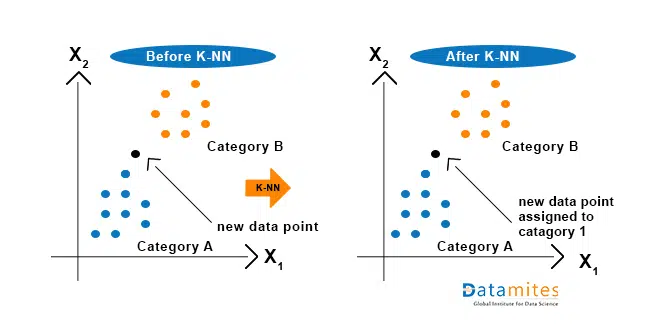

K-Nearest Neighbors (KNN) adalah algoritma machine learning supervised yang menginvestigasi kemiripan data baru terhadap klasifikasi yang sudah ada, kemudian memasukkan data tersebut ke dalam kategori yang paling menyerupai.

Pada dasarnya algoritma KNN menyimpan semua data yang sudah ada dan mengklasifikasikan titik data baru berdasarkan kemiripan dengan klasifikasi yang sudah ada.

Pada fase training, algoritma KNN hanya akan menyimpan data dalam plot seperti gambar di atas, dan ketika mendapatkan data baru, algoritma akan berusaha untuk memasangkan data tersebut ke dalam kategori yang mewakili.

Di bawah ini adalah cara untuk melakukan 'fitting' data yang kita miliki ke dalam klasifikasi model KNN:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

### Naive Bayes

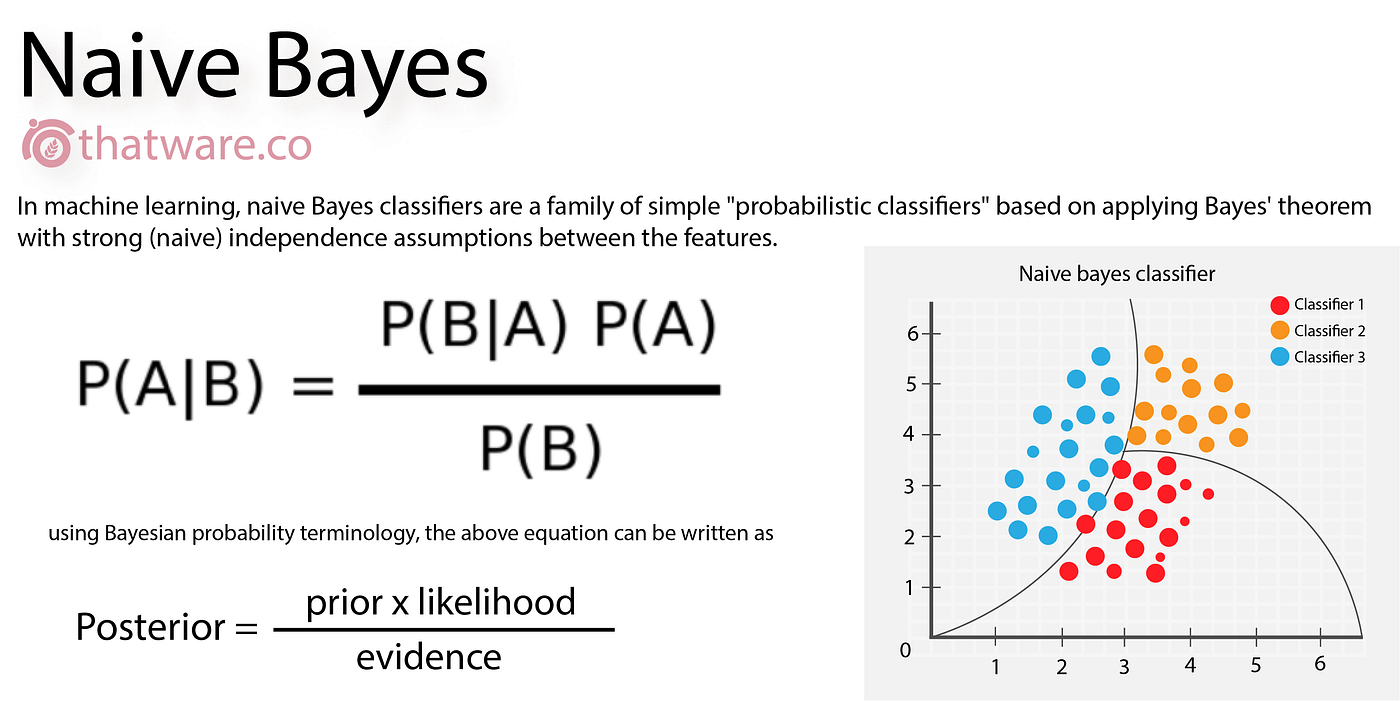

Naive Bayes adalah teknik klasifikasi statistik berdasarkan Teori Bayes. Naive Bayes termasuk algoritma machine learning yang bersifat supervised, dan memiliki akurasi tinggi dan kecepatan yang cukup cepat pada dataset besar.

Pengklasifikasi Naive Bayes mengasumsikan bahwa pengaruh fitur tertentu dalam suatu kelas tidak bergantung pada fitur lainnya. Misalnya, pemohon pinjaman diinginkan atau tidak tergantung pada pendapatannya, riwayat pinjaman dan transaksi sebelumnya, usia, dan lokasi. Meskipun fitur-fitur ini saling bergantung, fitur-fitur ini tetap dianggap independen. Asumsi ini menyederhanakan perhitungan, dan oleh karena itu dianggap naif. Asumsi ini disebut independensi bersyarat kelas.

#### Untuk satu feature

Langkah penentuan probabilitas Naive Bayes:

1. Hitung probabilitas sebelumnya untuk label kelas tertentu
2. Temukan probabilitas Kemungkinan dengan setiap atribut untuk setiap kelas
3. Masukkan nilai ini ke dalam Rumus Bayes dan hitung probabilitas posterior.
4. Lihat kelas mana yang memiliki probabilitas lebih tinggi, mengingat inputnya termasuk dalam kelas probabilitas lebih tinggi.



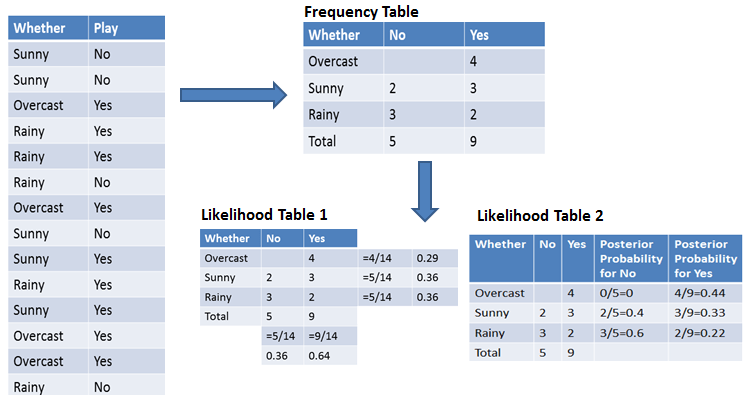

#### Untuk lebih dari satu feature

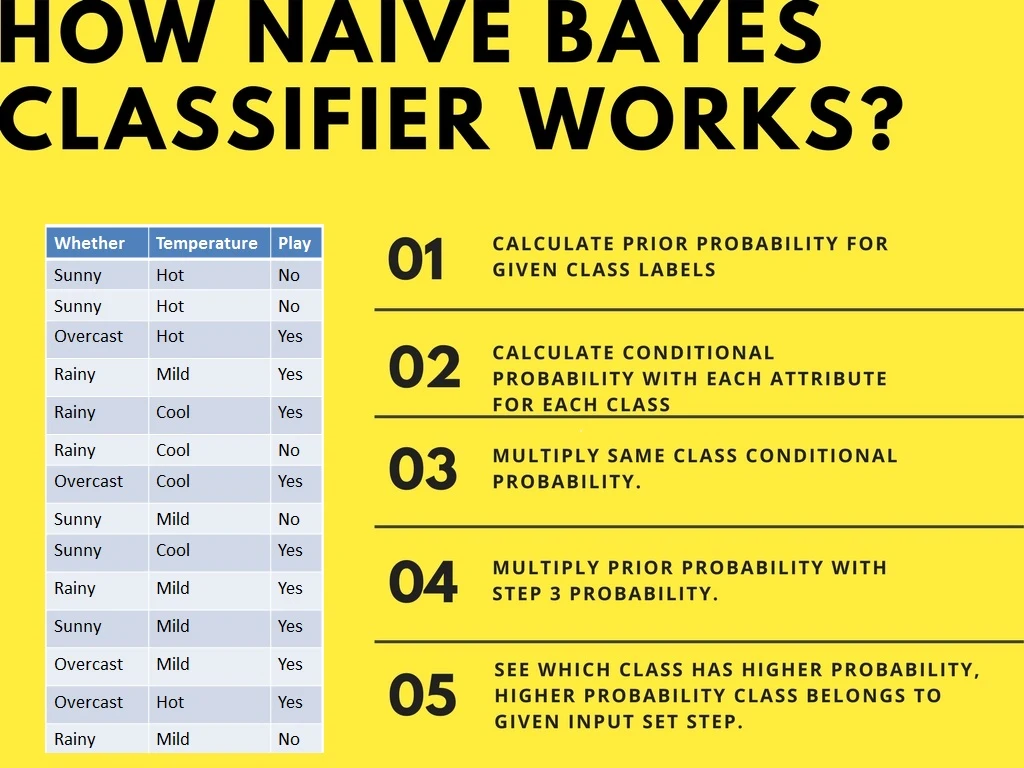

Di bawah ini adalah cara untuk melakukan 'fitting' data yang kita miliki ke dalam klasifikasi model Naive Bayes:

In [ ]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)
y_pred = nbc.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

### Support Vector Machine

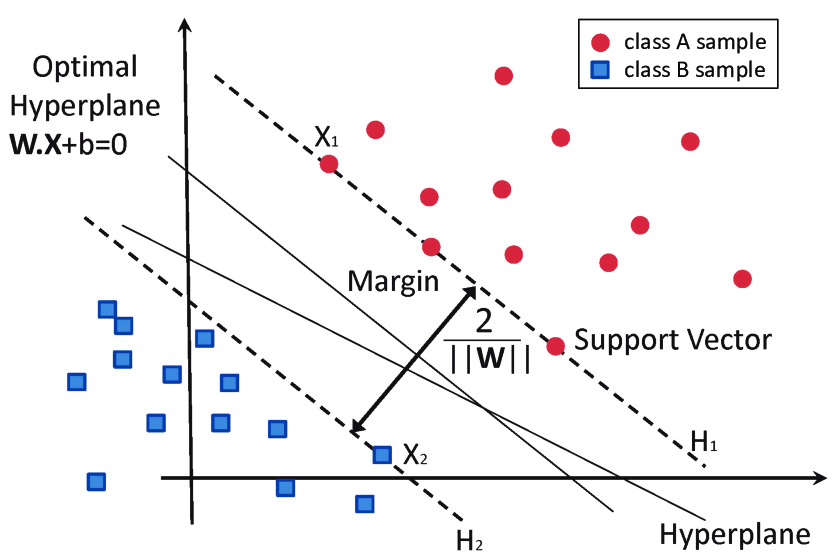

Support Vector Machine (SVM) adalah metode machine learning yang bersifat supervised, dimana model akan mencari garis yang membagi kedua kelas secara optimal.

Mirip dengan logistic regression, dimana logreg merupakan pendekatan secara probabilistik, SVM menggunakan pendekatan secara statistik.

Bisa terdapat garis sebanyak tak hingga yang membagi kelas, namun SVM akan mencari margin maksimal di antara semua garis (jarak maksimal antara kedua kelas)

Juga terdapat dua tipe SVM:

1. Linear SVM, yakni ketika data yang dapat terbagi linear secara sempurna, yang berarti titik data dapat diklasifikasikan menjadi 2 kelas dengan sebuah garis lurus.
2. Non-Linear SVM, yakni ketika data tidak dapat dipisahkan secara linear, dimana kita dapat menggunakan kernel untuk memecahkan masalah-masalah tersebut.

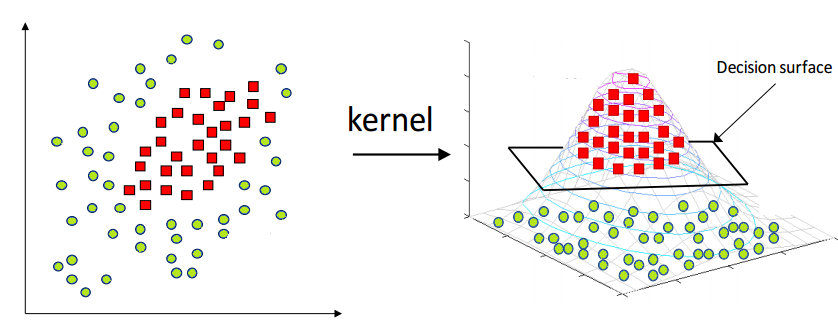

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

### Neural Networks

![link text](https://www.analyticsvidhya.com/wp-content/uploads/2016/08/Artificial-Intelligence-Neural-Network-Nodes.jpg)

Neural Networks (NN) terdiri dari node layers, berisi input layer, satu atau lebih hidden layer, dan output layer. Setiap node, atau neuron, terhubung satu sama lain dan memiliki bobot dan ambang batas yang terkait. Jika output dari setiap node berada di atas nilai ambang batas yang ditentukan, node tersebut diaktifkan, mengirimkan data ke lapisan jaringan berikutnya. Jika tidak, tidak ada data yang diteruskan ke lapisan jaringan berikutnya.

Sebuah Neural Network mengandalkan data pelatihan untuk mempelajari dan meningkatkan akurasinya seiring waktu. Namun, setelah algoritma pembelajaran ini disesuaikan keakuratannya, algoritma tersebut akan menjadi alat yang ampuh dalam ilmu komputer dan kecerdasan buatan, yang memungkinkan kita mengklasifikasikan dan mengelompokkan data dengan kecepatan tinggi. Voice recognition atau image recognition hanya akan memakan waktu beberapa menit dibandingkan jam jika dibandingkan dengan identifikasi manual yang dilakukan oleh para ahli. Salah satu jaringan saraf yang paling terkenal adalah algoritma pencarian Google.

Dalam tutorial ini, kita akan menggunakan library TensorFlow dari Google sebagai berikut:

In [ ]:
import tensorflow as tf

In [ ]:
nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

## Model Selection

Setelah mendapatkan kelayakan dari masing-masing model klasifikasi, kita dapat memilih model yang memiliki performance paling baik.

In [ ]:
X_balanced

In [ ]:
numeric_features = ['age', 'fare']
categorical_features = ['pclass', 'sex', 'alone', 'Cherbourg', 'Queenstown']

numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'))

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features))

pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', RandomForestClassifier())])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=130)

In [ ]:
fold_num = 1
scores = []

for train_index, test_index in skf.split(X_balanced, y_balanced):
  X_train, X_test = X_balanced.loc[train_index], X_balanced.loc[test_index]
  y_train, y_test = y_balanced[train_index], y_balanced[test_index]
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  scores.append(score)
  print(f"Accuracy for fold {fold_num}: ", score)
  fold_num += 1

In [ ]:
names = ['Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'SVM', 'Logistic Regression', 'Neural Networks']

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(3),
    GaussianNB(),
    SVC(kernel='linear'),
    LogisticRegression(),
    MLPClassifier(alpha=1, max_iter=1000)
]

scores = pd.DataFrame(index=names, columns=[1, 2, 3, 4, 5], data=0)
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5], columns=['train', 'test'])

for i, (train_index, test_index) in enumerate(skf.split(X_balanced, y_balanced)):
  i += 1
  print(f'\nK-fold cross validation {i}:')
  X_train, X_test = X_balanced.loc[train_index], X_balanced.loc[test_index]
  y_train, y_test = y_balanced[train_index], y_balanced[test_index]
  kfold_set.at[i, 'train'] = train_index
  kfold_set.at[i, 'test'] = test_index
  for name, clf in zip(names, classifiers):
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('clf', clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"Accuracy for model {name}: ", score)
    scores.at[name, i] = score
  i += 1

scores

In [ ]:
kfold_set

# Feedback Tutorial #2 PMA

halo ges semoga masih segar dan masih semangat belajar PMA yagesyak awkaokwoa, jangan kapok ges sebenernya materinya seru kok 🙏

btw dibawah ini form feedbacknya, monggo diisi sesuai kenyataan, dan monggo banget kalo mau memberikan saran" atau semacamnya agar tutorial ke depannya bisa makin sip anjay gg gemink

[kunci jawaban uts](https://forms.gle/mXQzKRFv2Gm3gueE7)